# Juntando R y Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [3]:
rpy2.robjects.numpy2ri.activate()

In [4]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [5]:
ro.r(codigo_r)

<rpy2.robjects.functions.SignatureTranslatedFunction object at 0x0000022221BEBC88> [RTYPES.CLOSXP]
R classes: ('function',)

In [6]:
saludar_py = ro.globalenv["saludar"]

In [7]:
res = saludar_py("Antonio Banderas")
res

"'Hola, Antonio Banderas'"


In [8]:
type(res)

rpy2.robjects.vectors.StrVector

In [9]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [10]:
var_from_python = ro.FloatVector(np.arange(1, 5, 0.1))

In [11]:
var_from_python

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [12]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [13]:
ro.globalenv["var_to_r"] = var_from_python

In [14]:
ro.r("var_to_r")

1.000000,1.100000,1.200000,...,4.700000,4.800000,4.900000


In [15]:
ro.r("sum(var_to_r)")

118.000000


In [16]:
np.sum(var_from_python)

118.00000000000007

In [17]:
ro.r("mean(var_to_r)")

2.950000


In [18]:
np.mean(var_from_python)

2.950000000000002

In [19]:
ro.r("sd(var_to_r)")

1.169045


In [20]:
np.std(var_from_python, ddof = 1)

1.169045194450013

In [21]:
ro.r("summary(var_to_r)")

1.000000,1.975000,2.950000,2.950000,3.925000,4.900000


In [22]:
# En los notebooks de Jupyter se cuelga cuando se te abre la ventana con el plot
#ro.r("hist(var_to_r, breaks = 4)")

In [23]:
ro.r("R.version")

<rpy2.robjects.vectors.ListVector object at 0x0000022221EF9448> [RTYPES.VECSXP]
R classes: ('simple.list',)
[StrSexpVe..., StrSexpVe..., StrSexpVe..., StrSexpVe..., ..., StrSexpVe..., StrSexpVe..., StrSexpVe..., StrSexpVe...]
  platform: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x000002222623D3C8> [RTYPES.STRSXP]
R classes: ('character',)
['x86_64-w64-mingw32']
  arch: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x00000222261EB1C8> [RTYPES.STRSXP]
R classes: ('character',)
['x86_64']
  os: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x00000222261F30C8> [RTYPES.STRSXP]
R classes: ('character',)
['mingw32']
  crt: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x00000222215F4148> [RTYPES.STRSXP]
R classes: ('character',)
['ucrt']
...
  status: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x0000022210A14DC8> [RTYPES.STRSXP]
R classes: ('character',)
['82648']
  major: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x00000222261E5C08> [RTYPES.STRSXP]
R classes: ('character',)
['R']
  minor: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x000002222621AE88> [RTYPES.STRSXP]
R classes: ('character',)
['R version 4.2.1 Patched (2022-07-29 r82648 ucrt)']
  year: <class 'rpy2.robjects.vectors.StrVector'>
  <rpy2.robjects.vectors.StrVector object at 0x000002222621AFC8> [RTYPES.STRSXP]
R classes: ('character',)
['Funny-Looking Kid']

## Trabajar de forma conjunta entre R y Python

In [24]:
from rpy2.robjects.packages import importr

In [25]:
ro.r("install.packages('extRemes')") # si falla decir 'n' al hacer la instalación
extremes = importr("extRemes") # library(extRemes)

R[write to console]: Installing package into 'C:/Users/mudar/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---


R[write to console]: trying URL 'https://cran.rediris.es/bin/windows/contrib/4.2/extRemes_2.1-2.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 1150676 bytes (1.1 MB)

R[write to console]: downloaded 1.1 MB




package 'extRemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mudar\AppData\Local\Temp\Rtmp0AFNQw\downloaded_packages


In [26]:
fevd = extremes.fevd

In [27]:
print(fevd.__doc__)

Wrapper around an R function.

The docstring below is built from the R documentation.

description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector object at 0x000002222621A788> [RTYPES.VECSXP],
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

Args:
   x :  'fevd': 'x' can be a numeric vector, the name of

In [28]:
data = pd.read_csv("../../datasets/time/time_series.txt",
                  sep = "\s+", skiprows = 1, parse_dates = [[0, 1]],
                  names = ["date", "time", "wind_speed"], index_col = 0)

In [29]:
data.head()

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [30]:
data.shape

(275352, 1)

In [31]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq = "A")).max()
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='date_time'>

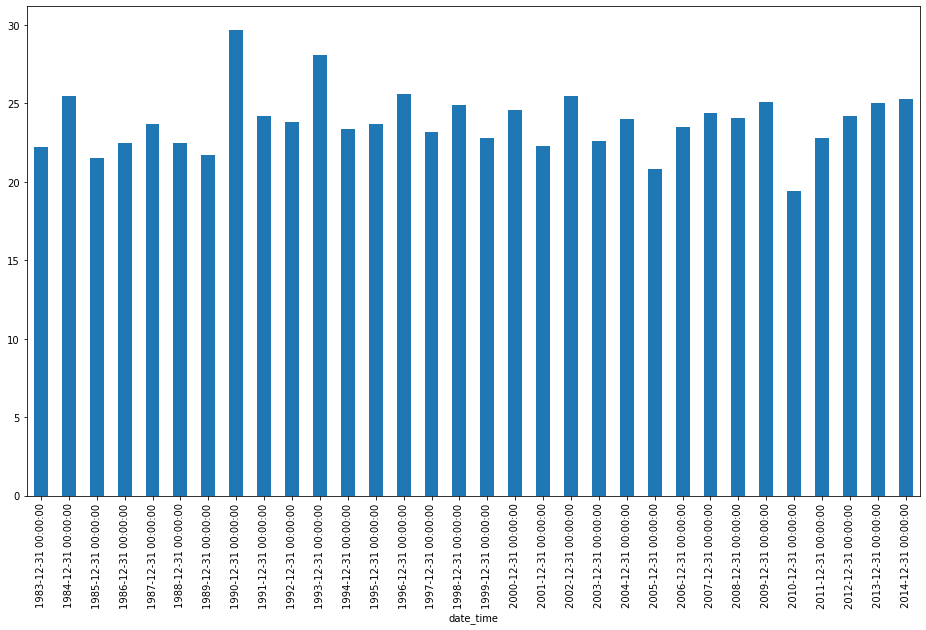

In [32]:
max_ws.plot(kind = "bar", figsize = (16, 9))

In [33]:
result = fevd(max_ws.values, type = "GEV", method = "GMLE")

In [34]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [35]:
result.r_repr()

'structure(list(call = (function (x, data, threshold = NULL, threshold.fun = ~1, \n    location.fun = ~1, scale.fun = ~1, shape.fun = ~1, use.phi = FALSE, \n    type = c("GEV", "GP", "PP", "Gumbel", "Exponential"), method = c("MLE", \n        "GMLE", "Bayesian", "Lmoments"), initial = NULL, span, \n    units = NULL, time.units = "days", period.basis = "year", \n    na.action = na.fail, optim.args = NULL, priorFun = NULL, \n    priorParams = NULL, proposalFun = NULL, proposalParams = NULL, \n    iter = 9999, weights = 1, blocks = NULL, verbose = FALSE) \n{\n    if (verbose) \n        begin.tiid <- Sys.time()\n    out <- list()\n    inout <- list()\n    out$call <- match.call()\n    if (!missing(data)) {\n        out$data.name <- c(deparse(substitute(x)), deparse(substitute(data)))\n    }\n    else {\n        out$data.name <- c(deparse(substitute(x)), "")\n    }\n    type <- match.arg(type)\n    method <- match.arg(method)\n    out$weights <- weights\n    if (!missing(data)) {\n        i

In [36]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 
 [5] "in.data"         "x"               "priorFun"        "priorParams"    
 [9] "method"          "type"            "period.basis"    "par.models"     
[13] "const.loc"       "const.scale"     "const.shape"     "n"              
[17] "na.action"       "parnames"        "results"         "initial.results"



In [37]:
res = result.rx("results")
print(res[0])

$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





In [38]:
loc, scale, shape = res[0].rx("par")[0]

In [39]:
loc

23.063941519915588

In [40]:
scale

1.7576912874286317

In [41]:
shape

-0.1628816367714792

## Función mágica para R

In [42]:
%load_ext rpy2.ipython

C:\Users\mudar\anaconda3\envs\prueba\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [43]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES]
             [--type {cairo,cairo-png,Xlib,quartz}] [-c CONVERTER] [-d DISPLAY]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with
    semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R R

In [44]:
%R X = c(1, 4, 5, 7); sd(X); mean(X)

array([4.25])

In [45]:
%%R
Y = c(2, 4, 3, 9)
lm = lm(Y~X)
summary(lm)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



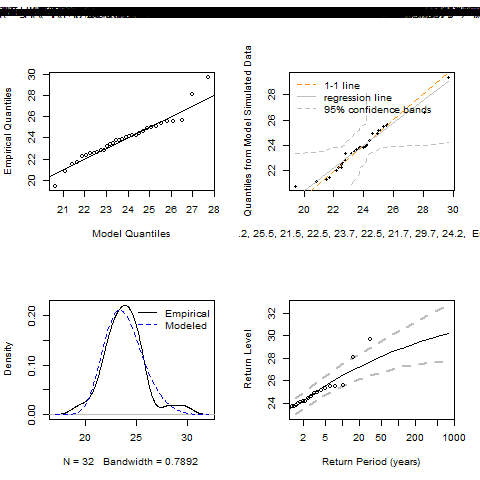

In [46]:
%R -i result plot.fevd(result)

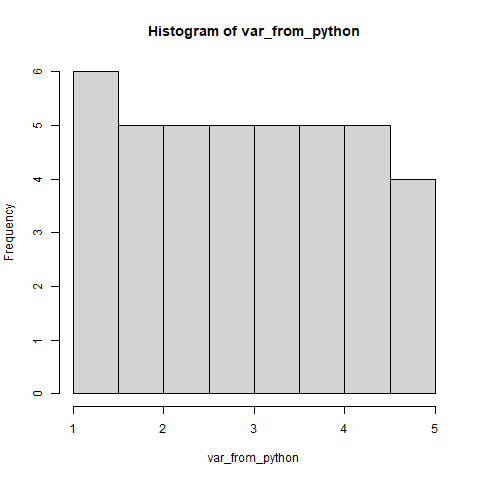

breaks,[RTYPES.REALSXP]
counts,[RTYPES.INTSXP]
density,[RTYPES.REALSXP]
mids,[RTYPES.REALSXP]
xname,[RTYPES.STRSXP]
equidist,[RTYPES.LGLSXP]


In [47]:
%R -i var_from_python hist(var_from_python)

In [48]:
# En los notebooks de Jupyter se cuelga cuando se te abre la ventana con el plot
#ro.globalenv["result"] = result
#ro.r("plot.fevd(result)") # Puede dar error y generar un objeto rpy2.rinterface.NULL

## Un ejemplo complejo de R, Python y Rmagic

In [49]:
metodos = ["MLE", "GMLE"]
# La siguiente línea salta error con el método Bayesian y Lmoments
#metodos = ["MLE", "GMLE", "Bayesian", "Lmoments"]
tipo = ["GEV", "Gumbel"]

Tipo de ajuste:  GEV
Método del ajuste:  MLE
$par
  location      scale      shape 
23.0517078  1.8085853 -0.1497984 

$value
[1] 66.22729

$counts
function gradient 
      28        6 

$convergence
[1] 0

$message
NULL

$hessian
           location      scale     shape
location  9.1825628 -0.3982934  11.22038
scale    -0.3982934 21.4422632  19.81854
shape    11.2203805 19.8185358 172.17411

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





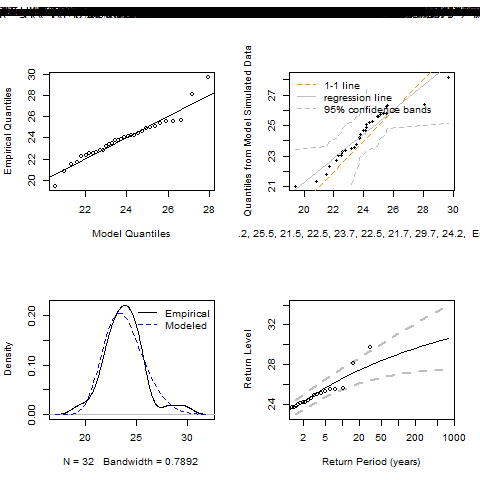

Tipo de ajuste:  GEV
Método del ajuste:  GMLE
$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





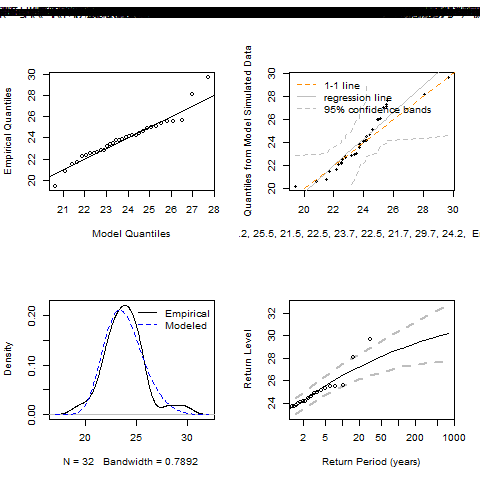

Tipo de ajuste:  Gumbel
Método del ajuste:  MLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





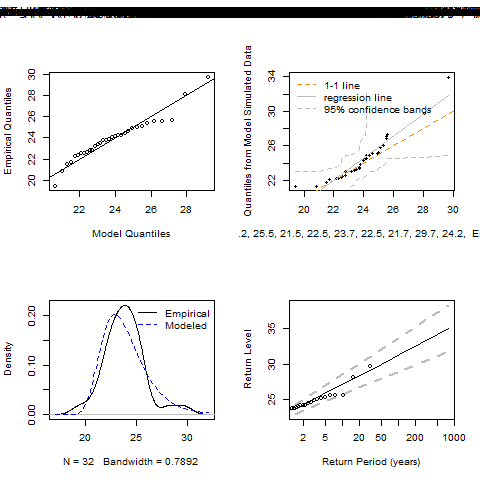

Tipo de ajuste:  Gumbel
Método del ajuste:  GMLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





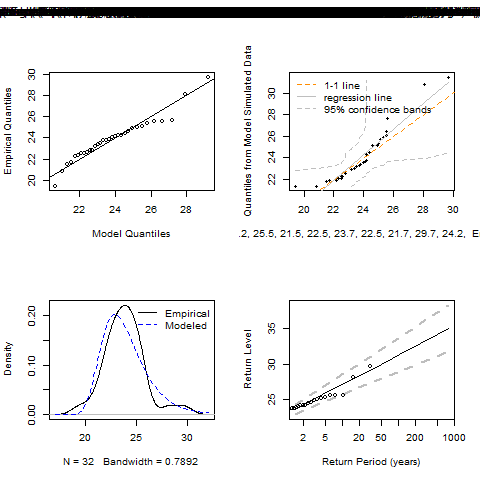

In [50]:
for t in tipo:
    for m in metodos:
        print("Tipo de ajuste: ", t)
        print("Método del ajuste: ", m)
        result = fevd(max_ws.values, method = m, type = t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)